<a href="https://colab.research.google.com/github/ArunitaYen/Classification_Hyperparameter/blob/main/Damaged_Crop_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# It is observed that the accuracy and prediction are better without oversampling (i.e. balacing) the data

# Observations

## ***Grid Search CV***  


*with oversapmling*

> **Random Forest**  
 Accuracy: 67.9045689849201  
 F1 Score: 0.731365248874125  

 

>**Decision Tree**  
 Accuracy: 63.23992797659239  
 F1 Score: 0.7001263141291102   



*Without oversampling*   


> **Random Forest**  
 Accuracy: 84.28989421562008  
 f1 score: 0.7880623936672897  


> **Decision Tree**  
 Accuracy: 84.05919423812739  
 F1 Score: 0.7934636286673246 

## ***Random Search CV***  


*with oversapmling*

> **Random Forest**  
Accuracy: 68.02835921674544  
f1 score: 0.7319591218626418   

>**Decision Tree**  
Accuracy: 66.21089354040063  
f1 score: 0.7182499927132402  



*Without oversampling*   


> **Random Forest**  
Accuracy: 84.28989421562008  
f1 score: 0.7880623936672897    


> **Decision Tree**  
Accuracy: 84.2111186135494  
f1 score: 0.7944785090782224

## Analysis

The models are giving better results without oversampling, so it can be suggested not to use any oversampling technique, also there is no overfitting occuring without oversampling, as it is being taken care by hyper parameter.

# Calling Libraries

In [1]:
# 1.1 Call libraries

## A. Data manipulation
import numpy as np
import pandas as pd

# 1.2 for data splitting
from sklearn.model_selection import train_test_split

## B. Transformers for predictors:

# 1.3 Class for imputing missing values
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
from sklearn.impute import SimpleImputer

# 1.4 One hot encode categorical data--Convert to dummy
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
from sklearn.preprocessing import OneHotEncoder as onehot

# 1.5 Scale numeric data
from sklearn.preprocessing import StandardScaler

## C. Transformer for target:

# 1.6 Label encode target column
from sklearn.preprocessing import LabelEncoder

## D. Composite Transformers:

# 1.7 Class for applying multiple data transformation
#     jobs parallely
from sklearn.compose import ColumnTransformer

# 1.8 Pipeline class: Class for applying multiple
#     data transformations sequentially
from sklearn.pipeline import Pipeline

## E. Estimator

# 1.9 Estimator
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# User guide: https://scikit-learn.org/stable/modules/tree.html
from sklearn.tree import DecisionTreeClassifier 

# 1.10 To plot graphs and pipeline diagram
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import set_config

In [2]:
# Display outputs of all commands from a cell--not just of the last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Mount google drive:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
path = "/gdrive/MyDrive/crop classification/agriculture.csv"

In [6]:
crop = pd.read_csv(path)

# Data exploration

In [ ]:
#ID: UniqueID Estimated_Insects_Count: Estimated insects count per square meter Crop_Type: Category of Crop(0,1) 
#Soil_Type: Category of Soil (0,1) Pesticide_Use_Category: Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using) 
#Number_Doses_Week: Number of doses per week Number_Weeks_Used: Number of weeks used 
#Number_Weeks_Quit: Number of weeks quit Season: Season Category (1,2,3) 
#Crop_Damage: Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)


crop.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [ ]:
#checking the shape of the dataset
crop.shape  #(rows = 89000, cols = 10)

(88858, 10)

In [ ]:
#checking null values in the dataset
crop.isna().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [ ]:
#checking the rows having null values to check the pattern if any
df = crop[crop.isna().any(axis=1)]
df.tail()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
88786,F00155793,1785,1,0,2,60,NaN,16,2,0
88788,F00155801,1898,1,0,2,15,NaN,3,1,0
88825,F00155882,2542,1,0,2,10,NaN,21,2,0
88833,F00155899,2687,1,0,2,10,NaN,21,2,0
88838,F00155906,2840,1,0,2,20,NaN,13,1,0


In [ ]:
#Crop_Type is categorical
crop["Crop_Type"].unique()

array([1, 0])

In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [15]:
num_columns=['Estimated_Insects_Count','Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit']
cat_columns=[ 'Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Season']

In [ ]:
df_crop=crop.drop('ID', axis=1)

In [ ]:
df_crop[num_columns].describe()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
count,88858.000000,88858.000000,79858.000000,88858.000000
mean,1399.012210,25.849952,28.623970,9.589986
std,849.048781,15.554428,12.391881,9.900631
min,150.000000,0.000000,0.000000,0.000000
25%,731.000000,15.000000,20.000000,0.000000
50%,1212.000000,20.000000,28.000000,7.000000
75%,1898.000000,40.000000,37.000000,16.000000
max,4097.000000,95.000000,67.000000,50.000000


#Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


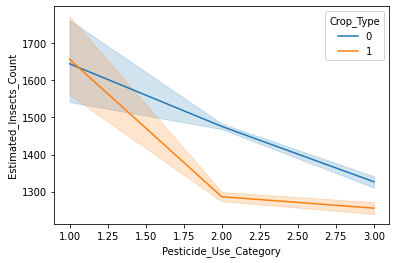

In [ ]:
#Line Plot
sns.lineplot( crop['Pesticide_Use_Category'], crop['Estimated_Insects_Count'],hue =crop["Crop_Type"])

This plot explains that as pesticide category varies from 1,2 to 3 , the estimated insects count also decreases for both the crop types.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


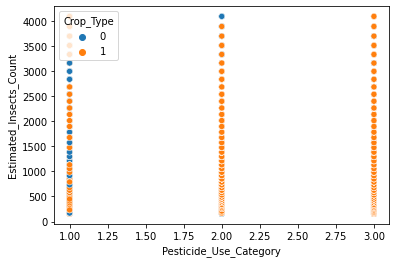

In [ ]:
#Scatterplot
sns.scatterplot(crop['Pesticide_Use_Category'], crop['Estimated_Insects_Count'],hue =crop["Crop_Type"])

This plot clearly tells that the pesticide category works absolutely fine with crop type"0" in reducing the insects count.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


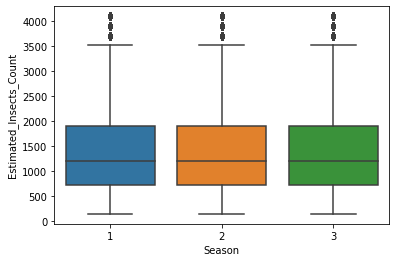

In [ ]:
#Boxplot
sns.boxplot( crop['Season'], crop['Estimated_Insects_Count'] )

Estimated insect count does not vary on the basis of season.

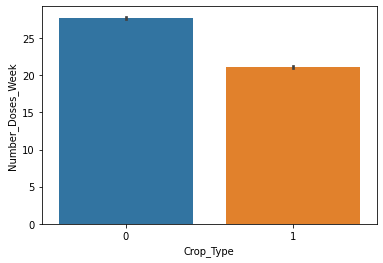

In [ ]:
#Barplot
sns.barplot(x ="Crop_Type", y ="Number_Doses_Week", data = crop)

Crop type 0 is given pesticides for more no of weeks

# **Structure in Data**

In [ ]:
ss= StandardScaler()

In [ ]:
num_data = crop[num_columns]
num_data.head()
num_data.shape       # (1000, 11)
num_data.columns
crop.info()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
0,188,0,0.0,0
1,209,0,0.0,0
2,257,0,0.0,0
3,257,0,0.0,0
4,342,0,0.0,0


(88858, 4)

Index(['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [ ]:
cols=num_columns

In [ ]:
nc = ss.fit_transform(num_data.loc[:,cols])

In [ ]:
nc.shape
nc = pd.DataFrame(nc, columns = cols)
nc.head(2)

(88858, 4)

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
0,-1.426324,-1.661912,-2.309911,-0.968629
1,-1.401591,-1.661912,-2.309911,-0.968629


In [ ]:
nc['Crop_Type'] = crop['Crop_Type']
nc['Soil_Type'] = crop['Soil_Type']
nc['Pesticide_Use_Category'] = crop['Pesticide_Use_Category']
nc['Season'] = crop['Season']
nc['Crop_Damage'] = crop['Crop_Damage']
nc.shape    

(88858, 9)

## Parallel coordinates plot

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

Text(0.5, 1.0, 'Parallel chart with crop data')

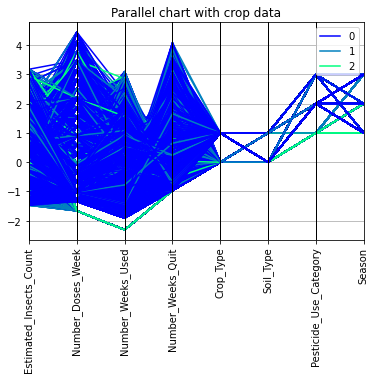

In [ ]:
#Parallel coordinates with 'crop' data
fig2 = plt.figure()
ax = pd.plotting.parallel_coordinates(nc,
                                 'Crop_Damage',
                                  colormap= plt.cm.winter
                                  )

plt.xticks(rotation=90)
plt.title("Parallel chart with crop data")


# All the crop damage have least variation for by season, soil type, pesticide_use_category and crop type
# and mostly affected by variation in Number_Doses _Week, and Number_Weeks_Quit

All the crop damage have least variation for by season, soil type, pesticide_use_category and crop type
and mostly affected by variation in Number_Doses _Week, and Number_Weeks_Quit

## Andrews plot

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 <a list of 9 Text major ticklabel objects>)

Text(0.5, 1.0, 'Andrews curve with crop data')

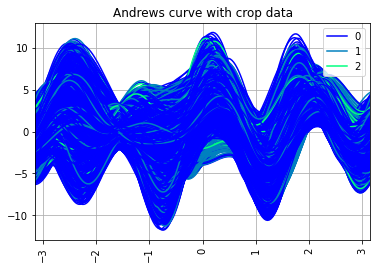

In [ ]:
#Andrews plots with crop data
fig4 = plt.figure()
pd.plotting.andrews_curves(nc,
                           'Crop_Damage',
                            colormap = plt.cm.winter
                           )
plt.xticks(rotation=90)
plt.title("Andrews curve with crop data")

#the andrews plot is telling us that data is well structed, and has variation

the andrews plot is telling us that data is well structed, and has variation

## Radvizplot

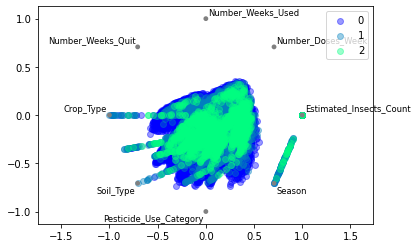

In [ ]:
# PLOT FOR CROP DATA
fig5 = plt.figure()
pd.plotting.radviz(nc,
                   class_column ='Crop_Damage',
                   colormap= plt.cm.winter,
                   alpha = 0.4
                   )

# the alive(0) crops are centraly located and are least affected by any one feature, but are equally affected by all 
# of them giving a balanced/ required output, more like combined effort
# while the crops damaged due to pesticides have high influence of soil type, and number of doses per week

the alive(0) crops are centraly located and are least affected by any one feature, but are equally affected by all 
of them giving a balanced/ required output, more like combined effort
while the crops damaged due to pesticides have high influence of soil type, and number of doses per week

In [ ]:
#checking if target is balanced
df_crop.Crop_Damage.value_counts() #the Target is imbalanced

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


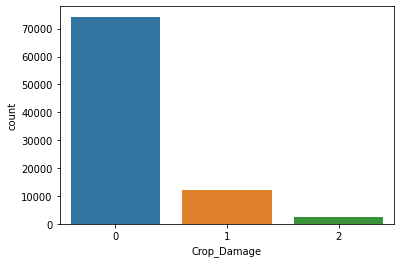

In [ ]:
#plotting the target
sns.countplot(df_crop['Crop_Damage']) #the target is imbalaced

##using SMOTE to oversample the data


> 
Synthetic Minority Oversampling Technique
Working of SMOTE

In [ ]:
#Replacing missing values with mode of the data .
df_crop['Number_Weeks_Used'].fillna(df_crop['Number_Weeks_Used'].mean(),inplace=True)

In [14]:
from imblearn.over_sampling import SMOTE

In [ ]:

# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE( random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(df_crop.drop('Crop_Damage', axis=1), df_crop['Crop_Damage'])
df_crop_os = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [ ]:
#checking if target is balanced
df_crop_os.Crop_Damage.value_counts()

0    74238
1    74238
2    74238
Name: Crop_Damage, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


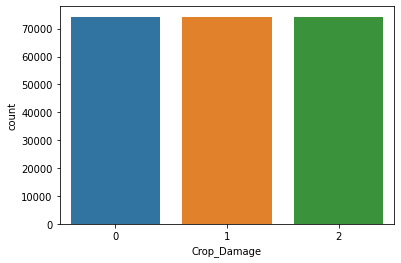

In [ ]:
#plotting the target
sns.countplot(df_crop_os['Crop_Damage']) #the target is now balaced

In [ ]:
df_crop_os.shape

(222714, 9)

#Pipelining


> Data pre-processing and oversampling with pipeline



In [7]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [8]:
from imblearn.pipeline import Pipeline as imbpipeline

In [9]:
df_crop_n= crop
df_crop_n.drop('ID', axis=1, inplace=True)

In [10]:
df_crop_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  88858 non-null  int64  
 1   Crop_Type                88858 non-null  int64  
 2   Soil_Type                88858 non-null  int64  
 3   Pesticide_Use_Category   88858 non-null  int64  
 4   Number_Doses_Week        88858 non-null  int64  
 5   Number_Weeks_Used        79858 non-null  float64
 6   Number_Weeks_Quit        88858 non-null  int64  
 7   Season                   88858 non-null  int64  
 8   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 6.1 MB


In [11]:
df_crop_n.Crop_Damage.value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

In [36]:
#numeric pipeline, for the numeric column and imputation strategy is 'mean'
numeric_pipeline = imbpipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ("polynomial", PolynomialFeatures(degree=4)), # feature engineering using Polynomial Feature
    ('scale', StandardScaler())
])

#categorical pipeline for category column and imputation strategy is 'most frequent' (if any)
categorical_pipeline = imbpipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder())
])

In [16]:
#fit transform categorical columns to categorical pipeline
categorical_pipeline.fit_transform(df_crop_n[cat_columns]).toarray()

array([[0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.]])

In [37]:
#fit transform numeric columns to numeric pipeline
numeric_pipeline.fit_transform(df_crop_n[num_columns])

array([[ 0.00000000e+00, -1.42632444e+00, -1.66191244e+00, ...,
        -6.35588653e-01, -4.88775996e-01, -3.41073882e-01],
       [ 0.00000000e+00, -1.40159074e+00, -1.66191244e+00, ...,
        -6.35588653e-01, -4.88775996e-01, -3.41073882e-01],
       [ 0.00000000e+00, -1.34505657e+00, -1.66191244e+00, ...,
        -6.35588653e-01, -4.88775996e-01, -3.41073882e-01],
       ...,
       [ 0.00000000e+00,  2.49337818e+00, -6.97551387e-01, ...,
         9.22248505e-04, -3.79491611e-01, -3.29899012e-01],
       [ 0.00000000e+00,  2.71244810e+00, -1.01900507e+00, ...,
         6.23136518e-01,  2.89234910e-01, -5.46741984e-02],
       [ 0.00000000e+00,  2.93976258e+00, -3.76097701e-01, ...,
        -2.18618069e-01, -4.21054896e-01, -3.34523378e-01]])

In [17]:
#parallel pipes for categorical and numerical columns
ct= ColumnTransformer(
    [
        ("num", numeric_pipeline, num_columns),
        ("cat", categorical_pipeline, cat_columns)
    ]
)

In [18]:
#fit transform the dataframe
ct.fit_transform(df_crop_n)

array([[-1.42632444, -1.66191244, -2.43660084, ...,  1.        ,
         0.        ,  0.        ],
       [-1.40159074, -1.66191244, -2.43660084, ...,  0.        ,
         1.        ,  0.        ],
       [-1.34505657, -1.66191244, -2.43660084, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 2.49337818, -0.69755139,  0.96837874, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.7124481 , -1.01900507, -0.3084886 , ...,  0.        ,
         0.        ,  1.        ],
       [ 2.93976258, -0.3760977 ,  0.71300527, ...,  0.        ,
         0.        ,  1.        ]])

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures

In [38]:
#creating the final pipeline to oversample the data and then apply random forest classification
pt= imbpipeline([
              ("ct",ct),
              ('sm',SMOTE( random_state=42)),
              ("rf", RandomForestClassifier())
])

In [75]:
#creating the final pipeline to oversample the data and then apply random forest classification
pt_wos= imbpipeline([
              ("ct",ct),
              
              ("rf", RandomForestClassifier())
])

In [39]:
#creating the final pipeline to oversample the data and then decision tree classification
pt_dt= imbpipeline([
              ("ct",ct),
              ('sm',SMOTE( random_state=42)),
              ('dt', DecisionTreeClassifier())
])

In [67]:
#creating the final pipeline without oversampling for decision tree classification
pt_dt_wos= imbpipeline([
              ("ct",ct),
              ('dt', DecisionTreeClassifier())
])

In [23]:
y=df_crop_n.pop('Crop_Damage')
X=df_crop_n

In [24]:
# Split dataset. We will preprocess X_train and apply that
#     processing to X_test later
X_train,X_test, y_train, y_test = train_test_split(
                                                    X,                   # Data features
                                                    y,                   # Target column
                                                    test_size = 0.2,      # split-ratio
                                                    random_state=11)


In [25]:
f"X_train shape: {X_train.shape}"    
print()
f"X_test.shape : {X_test.shape}"     
print()
f"y_train shape: {y_train.shape}"    
print()
f"y_test shape : {y_test.shape}"

'X_train shape: (71086, 8)'

'X_test.shape : (17772, 8)'

'y_train shape: (71086,)'

'y_test shape : (17772,)'

In [52]:
#fitting the training model for random forest
pt.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Estimated_Insects_Count',
                                                   'Number_Doses_Week',
                                                   'Number_Weeks_Used',
                                                   'Number_Weeks_Quit']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                       

In [76]:
#fitting the training model for random forest
pt_wos.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Estimated_Insects_Count',
                                                   'Number_Doses_Week',
                                                   'Number_Weeks_Used',
                                                   'Number_Weeks_Quit']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                       

In [41]:
#fitting the training model
pt_dt.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Estimated_Insects_Count',
                                                   'Number_Doses_Week',
                                                   'Number_Weeks_Used',
                                                   'Number_Weeks_Quit']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                       

In [68]:
#fitting the training model without oversampling
pt_dt_wos.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Estimated_Insects_Count',
                                                   'Number_Doses_Week',
                                                   'Number_Weeks_Used',
                                                   'Number_Weeks_Quit']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                       

In [53]:
#predicting the crop damage
pt.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [78]:
#predicting the crop damage
pt_wos.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
#predicting the crop damage
pt_dt.predict(X_test)

array([0, 0, 0, ..., 0, 0, 2])

In [77]:
#predicting the crop damage without oversampling
pt_dt_wos.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


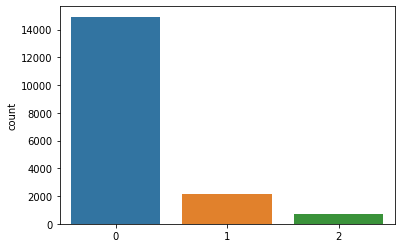

In [ ]:
#plot predicted result
sns.countplot(pt.predict(X_test))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


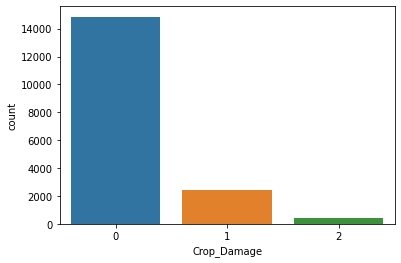

In [ ]:
#plot actual result
sns.countplot(y_test)

Text(0.5, 1.0, 'Actual vs Predicted Values')

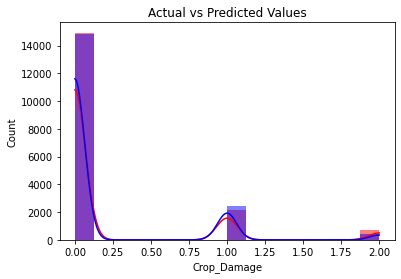

In [ ]:
#plot actual and predicted values for random forest

ax = sns.histplot(pt.predict(X_test), color="r", label="PREDICTED", kde=True, linewidth = 0)
sns.histplot(y_test, color="b", label="ACTUAL", kde=True, linewidth=0)


plt.title('Actual vs Predicted Values')


plt.show()
plt.close()

There is a possibility of overfitting

Text(0.5, 1.0, 'Actual vs Predicted Values')

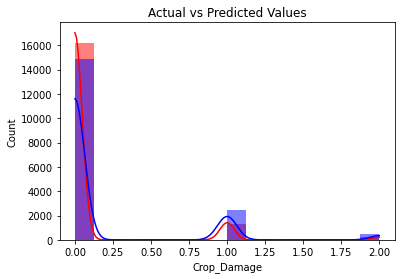

In [79]:
#plot actual and predicted values for random forest without oversampling

ax = sns.histplot(pt_wos.predict(X_test), color="r", label="PREDICTED", kde=True, linewidth = 0)
sns.histplot(y_test, color="b", label="ACTUAL", kde=True, linewidth=0)


plt.title('Actual vs Predicted Values')


plt.show()
plt.close()

Lesser possibiility of/ no overfitting

Text(0.5, 1.0, 'Actual vs Predicted Values')

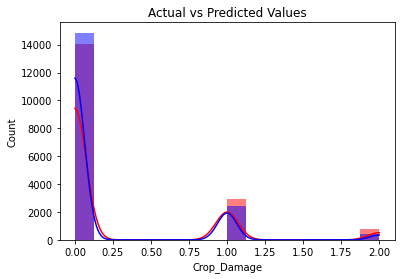

In [ ]:
#plot actual and predicted values for decision tree

ax = sns.histplot(pt_dt.predict(X_test), color="r", label="PREDICTED", kde=True, linewidth = 0)
sns.histplot(y_test, color="b", label="ACTUAL", kde=True, linewidth=0)


plt.title('Actual vs Predicted Values')


plt.show()
plt.close()

Text(0.5, 1.0, 'Actual vs Predicted Values')

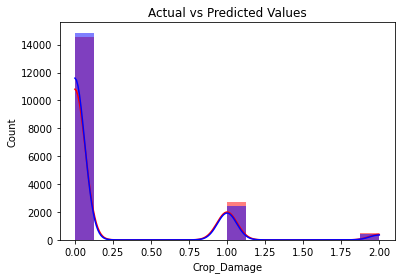

In [74]:
#plot actual and predicted values for decision tree without oversampling

ax = sns.histplot(pt_dt_wos.predict(X_test), color="r", label="PREDICTED", kde=True, linewidth = 0)
sns.histplot(y_test, color="b", label="ACTUAL", kde=True, linewidth=0)


plt.title('Actual vs Predicted Values')


plt.show()
plt.close()

Lesser overfitting in decision tree classification

#Cross Validation

In [48]:
# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

##Grid Search Cross Validation
> Random Forest

### with oversampling

In [54]:
#Check the list of available parameters 
pt.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'ct', 'sm', 'rf', 'ct__n_jobs', 'ct__remainder', 'ct__sparse_threshold', 'ct__transformer_weights', 'ct__transformers', 'ct__verbose', 'ct__verbose_feature_names_out', 'ct__num', 'ct__cat', 'ct__num__memory', 'ct__num__steps', 'ct__num__verbose', 'ct__num__impute', 'ct__num__scale', 'ct__num__impute__add_indicator', 'ct__num__impute__copy', 'ct__num__impute__fill_value', 'ct__num__impute__missing_values', 'ct__num__impute__strategy', 'ct__num__impute__verbose', 'ct__num__scale__copy', 'ct__num__scale__with_mean', 'ct__num__scale__with_std', 'ct__cat__memory', 'ct__cat__steps', 'ct__cat__verbose', 'ct__cat__impute', 'ct__cat__one-hot', 'ct__cat__impute__add_indicator', 'ct__cat__impute__copy', 'ct__cat__impute__fill_value', 'ct__cat__impute__missing_values', 'ct__cat__impute__strategy', 'ct__cat__impute__verbose', 'ct__cat__one-hot__categories', 'ct__cat__one-hot__drop', 'ct__cat__one-hot__dtype', 'ct__cat__one-hot__handle_unknown', 'ct__cat__one

In [55]:
# Define dictionary
#
parameters = { 'rf__n_estimators'     :  [200,300],             # Number of trees in random forest
               'rf__max_features'     :  ['auto','sqrt'],       # Number of features to consider at every split
               'rf__max_depth'        :  [8,10],                # Maximum number of levels in tree
               'rf__min_samples_split':  [10, 15, 20],          # Minimum number of samples required to split a node
               'rf__bootstrap'        :  [True]                 # Method of selecting samples for training each tree (WITH OR WITHOUT REPLACEMENT)
              
               }                               # Total: 2 * 2 * 2 * 3 * 1 = 24



In [56]:
#param_grid = {'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(estimator=pt,
                           param_grid=parameters,
                           scoring = ['accuracy'],
                           cv=5,
                           n_jobs=-1,
                           verbose =1,         # Higher the value, more the verbosity
                           refit = 'accuracy'
                           )

start = time.time()
grid_search.fit(X_train, y_train)
print("\n\n--Takes time...---\n")
end = time.time()
print()
(end - start)/60               # 50 min
# grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['Estimated_Insects_Count',
                                                                          'Number_Doses_Week',
                                                                          'Number_Weeks_Used',
                                                                          'Number_Weeks_Quit']),
                                                 



--Takes time...---




47.58495284318924

In [57]:
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')


Cross-validation score: 0.682370585269401
Test score: 0.679045689849201


In [58]:
grid_search.best_params_

{'rf__bootstrap': True,
 'rf__max_depth': 10,
 'rf__max_features': 'sqrt',
 'rf__min_samples_split': 15,
 'rf__n_estimators': 200}

In [59]:
# Make predictions using the best returned model
y_pred = grid_search.predict(X_test)
print("--Few predictions--\n")
y_pred[:4]

# Accuracy score
print("\n\n--Accuracy Score--\n")
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100.0             # 'Accuracy: 68.02835921674544'

# Confusion matrix
print("\n\n--Confusion Matrix--\n")
confusion_matrix( y_test,y_pred)

# F1 score
print("\n\n--F1 Score pos-label: 1--\n")
f1_score(y_test,y_pred, pos_label = 1, average="weighted")      # 0.7322726999126774

--Few predictions--



array([1, 0, 0, 0])



--Accuracy Score--



67.9045689849201



--Confusion Matrix--



array([[11036,  2188,  1631],
       [  826,   781,   860],
       [   87,   112,   251]])



--F1 Score pos-label: 1--



0.731365248874125

### without oversampling (smote)


In [80]:
#Check the list of available parameters 
pt_wos.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'ct', 'rf', 'ct__n_jobs', 'ct__remainder', 'ct__sparse_threshold', 'ct__transformer_weights', 'ct__transformers', 'ct__verbose', 'ct__verbose_feature_names_out', 'ct__num', 'ct__cat', 'ct__num__memory', 'ct__num__steps', 'ct__num__verbose', 'ct__num__impute', 'ct__num__scale', 'ct__num__impute__add_indicator', 'ct__num__impute__copy', 'ct__num__impute__fill_value', 'ct__num__impute__missing_values', 'ct__num__impute__strategy', 'ct__num__impute__verbose', 'ct__num__scale__copy', 'ct__num__scale__with_mean', 'ct__num__scale__with_std', 'ct__cat__memory', 'ct__cat__steps', 'ct__cat__verbose', 'ct__cat__impute', 'ct__cat__one-hot', 'ct__cat__impute__add_indicator', 'ct__cat__impute__copy', 'ct__cat__impute__fill_value', 'ct__cat__impute__missing_values', 'ct__cat__impute__strategy', 'ct__cat__impute__verbose', 'ct__cat__one-hot__categories', 'ct__cat__one-hot__drop', 'ct__cat__one-hot__dtype', 'ct__cat__one-hot__handle_unknown', 'ct__cat__one-hot__

In [82]:
# Define dictionary
#
parameters_wos = { 'rf__n_estimators'     :  [200,300],             # Number of trees in random forest
               'rf__max_features'     :  ['auto','sqrt'],       # Number of features to consider at every split
               'rf__max_depth'        :  [8,10],                # Maximum number of levels in tree
               'rf__min_samples_split':  [10, 15, 20],          # Minimum number of samples required to split a node
               'rf__bootstrap'        :  [True]                 # Method of selecting samples for training each tree (WITH OR WITHOUT REPLACEMENT)
              
               }                               # Total: 2 * 2 * 2 * 3 * 1 = 24



In [83]:
#param_grid = {'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search_wos = GridSearchCV(estimator=pt_wos,
                           param_grid=parameters_wos,
                           scoring = ['accuracy'],
                           cv=5,
                           n_jobs=-1,
                           verbose =1,         # Higher the value, more the verbosity
                           refit = 'accuracy'
                           )

start = time.time()
grid_search_wos.fit(X_train, y_train)
print("\n\n--Takes time...---\n")
end = time.time()
print()
(end - start)/60               # 15 min
# grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['Estimated_Insects_Count',
                                                                          'Number_Doses_Week',
                                                                          'Number_Weeks_Used',
                                                                          'Number_Weeks_Quit']),
                                                 



--Takes time...---




12.401381707191467

In [84]:
cv_score = grid_search_wos.best_score_
test_score = grid_search_wos.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')


Cross-validation score: 0.84264129749508
Test score: 0.8431802835921675


In [85]:
grid_search.best_params_

{'rf__bootstrap': True,
 'rf__max_depth': 10,
 'rf__max_features': 'sqrt',
 'rf__min_samples_split': 15,
 'rf__n_estimators': 200}

In [87]:
# Make predictions using the best returned model
y_pred = grid_search_wos.predict(X_test)
print("--Few predictions--\n")
y_pred[:4]

# Accuracy score
print("\n\n--Accuracy Score--\n")
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100.0             # 'Accuracy: 68.02835921674544'

# Confusion matrix
print("\n\n--Confusion Matrix--\n")
confusion_matrix( y_test,y_pred)

# F1 score
print("\n\n--F1 Score pos-label: 1--\n")
f1_score(y_test,y_pred, pos_label = 1, average="weighted")      # 0.7322726999126774

--Few predictions--



array([0, 0, 0, 0])



--Accuracy Score--



84.31802835921674



--Confusion Matrix--



array([[14755,   100,     0],
       [ 2236,   230,     1],
       [  381,    69,     0]])



--F1 Score pos-label: 1--



0.7876750720829379

##Grid Search Cross Validation
> Decision Tree

### With oversampling

In [43]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

In [44]:
#Check the list of available parameters 
pt_dt.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'ct', 'sm', 'dt', 'ct__n_jobs', 'ct__remainder', 'ct__sparse_threshold', 'ct__transformer_weights', 'ct__transformers', 'ct__verbose', 'ct__verbose_feature_names_out', 'ct__num', 'ct__cat', 'ct__num__memory', 'ct__num__steps', 'ct__num__verbose', 'ct__num__impute', 'ct__num__scale', 'ct__num__impute__add_indicator', 'ct__num__impute__copy', 'ct__num__impute__fill_value', 'ct__num__impute__missing_values', 'ct__num__impute__strategy', 'ct__num__impute__verbose', 'ct__num__scale__copy', 'ct__num__scale__with_mean', 'ct__num__scale__with_std', 'ct__cat__memory', 'ct__cat__steps', 'ct__cat__verbose', 'ct__cat__impute', 'ct__cat__one-hot', 'ct__cat__impute__add_indicator', 'ct__cat__impute__copy', 'ct__cat__impute__fill_value', 'ct__cat__impute__missing_values', 'ct__cat__impute__strategy', 'ct__cat__impute__verbose', 'ct__cat__one-hot__categories', 'ct__cat__one-hot__drop', 'ct__cat__one-hot__dtype', 'ct__cat__one-hot__handle_unknown', 'ct__cat__one

In [45]:
# Define dictionary for decision tree
#
parameters_dt = { 'dt__criterion'         : ['gini','entropy'],
                  'dt__max_depth'         : [10,15],
                  'dt__splitter'          : ['random'],
                  'dt__min_samples_split' : [15,25]
              
               }                               # Total: 2 * 2 * 1 * 2 = 8


In [46]:
import time

In [49]:

grid_search_dt = GridSearchCV(estimator=pt_dt,
                           param_grid=parameters_dt,
                           scoring = ['accuracy', 'f1'],
                           cv=5,
                           n_jobs=-1,
                           verbose =1,         # Higher the value, more the verbosity
                           refit = 'f1'
                           )

start = time.time()
grid_search_dt.fit(X_train, y_train)
print("\n\n--Takes time...---\n")
end = time.time()
print()
(end - start)/60               # 1 minute


Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  category=UserWarning,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['Estimated_Insects_Count',
                                                                          'Number_Doses_Week',
                                                                          'Number_Weeks_Used',
                                                                          'Number_Weeks_Quit']),
                                                 



--Takes time...---




0.37995573282241824

In [50]:
grid_search_dt.best_params_

{'dt__criterion': 'gini',
 'dt__max_depth': 10,
 'dt__min_samples_split': 15,
 'dt__splitter': 'random'}

In [51]:
# Make predictions using the best returned model
y_pred = grid_search_dt.predict(X_test)
print("--Few predictions--\n")
y_pred[:4]

# Accuracy score
print("\n\n--Accuracy Score--\n")
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100.0             # 'Accuracy: 64.78730587440918'

# Confusion matrix
print("\n\n--Confusion Matrix--\n")
confusion_matrix( y_test,y_pred)

# F1 score
print("\n\n--F1 Score pos-label: 1--\n")
f1_score(y_test,y_pred, pos_label = 1, average="weighted")      # 0.7104331919025608

--Few predictions--



array([1, 0, 0, 0])



--Accuracy Score--



63.23992797659239



--Confusion Matrix--



array([[10323,  2072,  2460],
       [  764,   638,  1065],
       [   79,    93,   278]])



--F1 Score pos-label: 1--



0.7001263141291102

### without oversampling

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

In [69]:
#Check the list of available parameters 
pt_dt_wos.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'ct', 'dt', 'ct__n_jobs', 'ct__remainder', 'ct__sparse_threshold', 'ct__transformer_weights', 'ct__transformers', 'ct__verbose', 'ct__verbose_feature_names_out', 'ct__num', 'ct__cat', 'ct__num__memory', 'ct__num__steps', 'ct__num__verbose', 'ct__num__impute', 'ct__num__scale', 'ct__num__impute__add_indicator', 'ct__num__impute__copy', 'ct__num__impute__fill_value', 'ct__num__impute__missing_values', 'ct__num__impute__strategy', 'ct__num__impute__verbose', 'ct__num__scale__copy', 'ct__num__scale__with_mean', 'ct__num__scale__with_std', 'ct__cat__memory', 'ct__cat__steps', 'ct__cat__verbose', 'ct__cat__impute', 'ct__cat__one-hot', 'ct__cat__impute__add_indicator', 'ct__cat__impute__copy', 'ct__cat__impute__fill_value', 'ct__cat__impute__missing_values', 'ct__cat__impute__strategy', 'ct__cat__impute__verbose', 'ct__cat__one-hot__categories', 'ct__cat__one-hot__drop', 'ct__cat__one-hot__dtype', 'ct__cat__one-hot__handle_unknown', 'ct__cat__one-hot__

In [70]:
# Define dictionary for decision tree
#
parameters_dt_wos = { 'dt__criterion'         : ['gini','entropy'],
                  'dt__max_depth'         : [10,15],
                  'dt__splitter'          : ['random'],
                  'dt__min_samples_split' : [15,25]
              
               }                               # Total: 2 * 2 * 1 * 2 = 8


In [ ]:
import time

In [71]:

grid_search_dt = GridSearchCV(estimator=pt_dt_wos,
                           param_grid=parameters_dt_wos,
                           scoring = ['accuracy', 'f1'],
                           cv=5,
                           n_jobs=-1,
                           verbose =1,         # Higher the value, more the verbosity
                           refit = 'f1'
                           )

start = time.time()
grid_search_dt.fit(X_train, y_train)
print("\n\n--Takes time...---\n")
end = time.time()
print()
(end - start)/60               # 2 sec


Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  category=UserWarning,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['Estimated_Insects_Count',
                                                                          'Number_Doses_Week',
                                                                          'Number_Weeks_Used',
                                                                          'Number_Weeks_Quit']),
                                                 



--Takes time...---




0.12031756639480591

In [72]:
grid_search_dt.best_params_

{'dt__criterion': 'gini',
 'dt__max_depth': 10,
 'dt__min_samples_split': 15,
 'dt__splitter': 'random'}

In [73]:
# Make predictions using the best returned model
y_pred = grid_search_dt.predict(X_test)
print("--Few predictions--\n")
y_pred[:4]

# Accuracy score
print("\n\n--Accuracy Score--\n")
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100.0             # 'Accuracy: 64.78730587440918'

# Confusion matrix
print("\n\n--Confusion Matrix--\n")
confusion_matrix( y_test,y_pred)

# F1 score
print("\n\n--F1 Score pos-label: 1--\n")
f1_score(y_test,y_pred, pos_label = 1, average="weighted")      # 0.7104331919025608

--Few predictions--



array([0, 0, 0, 0])



--Accuracy Score--



84.05919423812739



--Confusion Matrix--



array([[14609,   243,     3],
       [ 2137,   325,     5],
       [  369,    76,     5]])



--F1 Score pos-label: 1--



0.7934636286673246

## Random Search Cross Validation
> Random Forest



### with oversampling

In [ ]:
# Tune parameters using random search

rs = RandomizedSearchCV(
                          pt,
                          param_distributions=parameters,
                          scoring= ['accuracy'],
                          n_iter=4,           # Max combination of
                                              # parameter to try. Default = 10
                          verbose = 1,
                          refit = 'accuracy',
                          n_jobs = -1,          # Use parallel cpu threads
                          cv = 5               # No of folds.
                                              # So n_iter * cv combinations
                        )

In [ ]:
start = time.time()
rs.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60   # 8 minutes

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('ct',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer()),
                                                                                               ('scale',
                                                                                                StandardScaler())]),
                                                                               ['Estimated_Insects_Count',
                                                                                'Number_Doses_Week',
                                                                                'Number_Weeks_Used',
                                                                                'Numbe

8.003995803991954

In [ ]:
# the parameters that gives best learning in random forest
rs.best_params_

{'rf__n_estimators': 200,
 'rf__min_samples_split': 10,
 'rf__max_features': 'sqrt',
 'rf__max_depth': 10,
 'rf__bootstrap': True}

In [ ]:
# Evaluate
f"Best score: {rs.best_score_} " ;print()           # 'Best score: 0.6813296245275972  '
# f"Best parameter set: {rs.best_params_} " ; print()


# Make predictions from the best returned model
y_pred = rs.predict(X_test)


# Accuracy and f1_score
accuracy = accuracy_score(y_test, y_pred)
f"Accuracy: {accuracy * 100.0}"   ; print()      # 'Accuracy: 68.02835921674544'
f"f1 score: {f1_score(y_test,y_pred, pos_label = 1, average='weighted')}" ; print()     # 0.7319591218626418

'Best score: 0.6813296245275972 '

'Accuracy: 68.02835921674544'

'f1 score: 0.7319591218626418'

### without oversampling

In [94]:
# Tune parameters using random search

rs_ws = RandomizedSearchCV(
                          pt_wos,
                          param_distributions=parameters_wos,
                          scoring= ['accuracy'],
                          n_iter=4,           # Max combination of
                                              # parameter to try. Default = 10
                          verbose = 1,
                          refit = 'accuracy',
                          n_jobs = -1,          # Use parallel cpu threads
                          cv = 5               # No of folds.
                                              # So n_iter * cv combinations
                        )

In [95]:
start = time.time()
rs_ws.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60   # 3 minutes

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('ct',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer()),
                                                                                               ('scale',
                                                                                                StandardScaler())]),
                                                                               ['Estimated_Insects_Count',
                                                                                'Number_Doses_Week',
                                                                                'Number_Weeks_Used',
                                                                                'Numbe

2.8120312293370566

In [96]:
# the parameters that gives best learning in random forest
rs_ws.best_params_

{'rf__n_estimators': 300,
 'rf__min_samples_split': 10,
 'rf__max_features': 'sqrt',
 'rf__max_depth': 10,
 'rf__bootstrap': True}

In [97]:
# Evaluate
f"Best score: {rs_ws.best_score_} " ;print()           # 'Best score: 0.6813296245275972  '
# f"Best parameter set: {rs.best_params_} " ; print()


# Make predictions from the best returned model
y_pred = rs_ws.predict(X_test)


# Accuracy and f1_score
accuracy = accuracy_score(y_test, y_pred)
f"Accuracy: {accuracy * 100.0}"   ; print()      # 'Accuracy: 68.02835921674544'
f"f1 score: {f1_score(y_test,y_pred, pos_label = 1, average='weighted')}" ; print()     # 0.7319591218626418

'Best score: 0.8424021580657655 '

'Accuracy: 84.28989421562008'

'f1 score: 0.7880623936672897'

## Random Search Cross Validation
> Decision Tree

### With oversampling

In [60]:
# Tune parameters using random search

rs_dt = RandomizedSearchCV(
                          pt_dt,
                          param_distributions=parameters_dt,
                          scoring= ['accuracy'],
                          n_iter=4,           # Max combination of
                                              # parameter to try. Default = 10
                          verbose = 1,
                          refit = 'accuracy',
                          n_jobs = -1,          # Use parallel cpu threads
                          cv = 5               # No of folds.
                                              # So n_iter * cv combinations
                        )

In [61]:
start = time.time()
rs_dt.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60   # 3 sec

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('ct',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer()),
                                                                                               ('scale',
                                                                                                StandardScaler())]),
                                                                               ['Estimated_Insects_Count',
                                                                                'Number_Doses_Week',
                                                                                'Number_Weeks_Used',
                                                                                'Numbe

0.22560417652130127

In [62]:
# the parameters that gives best learning in decision tree
rs_dt.best_params_

{'dt__splitter': 'random',
 'dt__min_samples_split': 25,
 'dt__max_depth': 15,
 'dt__criterion': 'gini'}

In [ ]:
# Evaluate
f"Best score: {rs_dt.best_score_} " ;print()           # 'Best score: 0.6813296245275972  '
# f"Best parameter set: {rs_dt.best_params_} " ; print()


# Make predictions from the best returned model
y_pred = rs_dt.predict(X_test)


# Accuracy and f1_score
accuracy = accuracy_score(y_test, y_pred)
f"Accuracy: {accuracy * 100.0}"   ; print()      # 'Accuracy: 66.21089354040063'
f"f1 score: {f1_score(y_test,y_pred, pos_label = 1, average='weighted')}" ; print()     # f1 score: 0.7182499927132402s

'Best score: 0.6626057685759401 '

'Accuracy: 66.21089354040063'

'f1 score: 0.7182499927132402'

### Without oversampling

In [88]:
# Hypertuning for decision tree

rs_dt_wos = RandomizedSearchCV(
                          pt_dt_wos,
                          param_distributions=parameters_dt,
                          scoring= ['accuracy'],
                          n_iter=4,           # Max combination of
                                              # parameter to try. Default = 10
                          verbose = 1,
                          refit = 'accuracy',
                          n_jobs = -1,          # Use parallel cpu threads
                          cv = 5               # No of folds.
                                              # So n_iter * cv combinations
                        )

In [91]:
start = time.time()
rs_dt_wos.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60   # 3 sec

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('ct',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer()),
                                                                                               ('scale',
                                                                                                StandardScaler())]),
                                                                               ['Estimated_Insects_Count',
                                                                                'Number_Doses_Week',
                                                                                'Number_Weeks_Used',
                                                                                'Numbe

0.07606090704600016

In [92]:
# the parameters that gives best learning in decision tree
rs_dt_wos.best_params_

{'dt__splitter': 'random',
 'dt__min_samples_split': 25,
 'dt__max_depth': 10,
 'dt__criterion': 'gini'}

In [93]:
# Evaluate
f"Best score: {rs_dt_wos.best_score_} " ;print()           # 'Best score: 0.6813296245275972  '
# f"Best parameter set: {rs_dt.best_params_} " ; print()


# Make predictions from the best returned model
y_pred = rs_dt_wos.predict(X_test)


# Accuracy and f1_score
accuracy = accuracy_score(y_test, y_pred)
f"Accuracy: {accuracy * 100.0}"   ; print()      # 'Accuracy: 66.21089354040063'
f"f1 score: {f1_score(y_test,y_pred, pos_label = 1, average='weighted')}" ; print()     # f1 score: 0.7182499927132402s

'Best score: 0.8397996617210286 '

'Accuracy: 84.2111186135494'

'f1 score: 0.7944785090782224'

# xgb classification without oversampling

In [98]:
from xgboost.sklearn import XGBClassifier

In [99]:
#creating the final pipeline to oversample the data and then apply XGB classification
pt_xg= imbpipeline([
              ("ct",ct),
              # ('sm',SMOTE( random_state=42)),
              ('xg',  XGBClassifier(silent = False, n_jobs=3))
])

In [100]:
#fitting the training model in xgb
pt_xg.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Estimated_Insects_Count',
                                                   'Number_Doses_Week',
                                                   'Number_Weeks_Used',
                                                   'Number_Weeks_Quit']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                       

In [101]:
#predicting the crop damage
pt_xg.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 1.0, 'Actual vs Predicted Values')

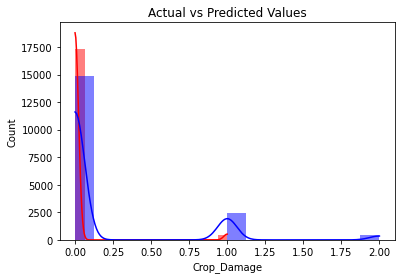

In [102]:
#plot actual and predicted values for decision tree

ax = sns.histplot(pt_xg.predict(X_test), color="r", label="PREDICTED", kde=True, linewidth = 0)
sns.histplot(y_test, color="b", label="ACTUAL", kde=True, linewidth=0)


plt.title('Actual vs Predicted Values')


plt.show()
plt.close()

In [103]:
#Check the list of available parameters 
pt_xg.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'ct', 'xg', 'ct__n_jobs', 'ct__remainder', 'ct__sparse_threshold', 'ct__transformer_weights', 'ct__transformers', 'ct__verbose', 'ct__verbose_feature_names_out', 'ct__num', 'ct__cat', 'ct__num__memory', 'ct__num__steps', 'ct__num__verbose', 'ct__num__impute', 'ct__num__scale', 'ct__num__impute__add_indicator', 'ct__num__impute__copy', 'ct__num__impute__fill_value', 'ct__num__impute__missing_values', 'ct__num__impute__strategy', 'ct__num__impute__verbose', 'ct__num__scale__copy', 'ct__num__scale__with_mean', 'ct__num__scale__with_std', 'ct__cat__memory', 'ct__cat__steps', 'ct__cat__verbose', 'ct__cat__impute', 'ct__cat__one-hot', 'ct__cat__impute__add_indicator', 'ct__cat__impute__copy', 'ct__cat__impute__fill_value', 'ct__cat__impute__missing_values', 'ct__cat__impute__strategy', 'ct__cat__impute__verbose', 'ct__cat__one-hot__categories', 'ct__cat__one-hot__drop', 'ct__cat__one-hot__dtype', 'ct__cat__one-hot__handle_unknown', 'ct__cat__one-hot__

In [104]:
# Define dictionary for xgb
#
parameters_xg = { 'xg__learning_rate'     : [0.03, 0.05],
                  'xg__n_estimators'      : [200,  300],
                  'xg__max_depth'         : [4,6],
                  'xg__booster'           : ['gbtree','gblinear']
              
               }                               # Total: 2 * 2 * 2 * 2 = 16


In [105]:

grid_search_XG = GridSearchCV(estimator=pt_xg,
                           param_grid=parameters_xg,
                           scoring = ['accuracy', 'f1'],
                           cv=5,
                           n_jobs=-1,
                           verbose =1,         # Higher the value, more the verbosity
                           refit = 'f1'
                           )

start = time.time()
grid_search_XG.fit(X_train, y_train)
print("\n\n--Takes time...---\n")
end = time.time()
print()
(end - start)/60               # 26 minute


Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['Estimated_Insects_Count',
                                                                          'Number_Doses_Week',
                                                                          'Number_Weeks_Used',
                                                                          'Number_Weeks_Quit']),
                                                 



--Takes time...---




26.624250173568726

In [106]:
grid_search_XG.best_params_

{'xg__booster': 'gbtree',
 'xg__learning_rate': 0.03,
 'xg__max_depth': 4,
 'xg__n_estimators': 200}

In [108]:
# Make predictions from the best returned model
y_pred = grid_search_XG.predict(X_test)


# Accuracy and f1_score
accuracy = accuracy_score(y_test, y_pred)
f"Accuracy: {accuracy * 100.0}"   ; print()      # 'Accuracy: 68.02835921674544'
f"f1 score: {f1_score(y_test,y_pred, pos_label = 1, average='weighted')}" ; print()     # 0.7319591218626418

'Accuracy: 84.5937429664641'

'f1 score: 0.7941032143495466'

In [109]:
# Tune parameters using xgb

rs_xg = RandomizedSearchCV(
                          pt_xg,
                          param_distributions=parameters_xg,
                          scoring= ['accuracy'],
                          n_iter=4,           # Max combination of
                                              # parameter to try. Default = 10
                          verbose = 1,
                          refit = 'accuracy',
                          n_jobs = -1,          # Use parallel cpu threads
                          cv = 5               # No of folds.
                                              # So n_iter * cv combinations
                        )

In [110]:
start = time.time()
rs_xg.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60   # 8 minutes

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('ct',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer()),
                                                                                               ('scale',
                                                                                                StandardScaler())]),
                                                                               ['Estimated_Insects_Count',
                                                                                'Number_Doses_Week',
                                                                                'Number_Weeks_Used',
                                                                                'Numbe

7.066762296358744

In [111]:
# the parameters that gives best learning in random forest
rs_xg.best_params_

{'xg__n_estimators': 200,
 'xg__max_depth': 6,
 'xg__learning_rate': 0.03,
 'xg__booster': 'gbtree'}

In [113]:
# Evaluate
f"Best score: {rs_xg.best_score_} " ;print()           # 'Best score: 0.6813296245275972  '
# f"Best parameter set: {rs.best_params_} " ; print()


# Make predictions from the best returned model
y_pred = rs_xg.predict(X_test)


# Accuracy and f1_score
accuracy = accuracy_score(y_test, y_pred)
f"Accuracy: {accuracy * 100.0}"   ; print()      # 'Accuracy: 68.02835921674544'
f"f1 score: {f1_score(y_test,y_pred, pos_label = 1, average='weighted')}" ; print()     # 0.7319591218626418

'Best score: 0.8455251412126765 '

'Accuracy: 84.6443844249381'

'f1 score: 0.8002323781288349'